In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
import os

In [2]:
folder_path = '/net/gpfs-amarolab/tklay/JAVI/root_1/residue_distances/'
files =[]
cutoff = []
for filename in os.listdir(folder_path):
    if filename.startswith("charge_density") and filename.endswith(".out"):
        result = re.search('charge_density_(.*).out', filename)
        if result:
            number_str = result.group(1)
            number_str = number_str.replace("_", ".")
            number = float(number_str)
            cutoff.append(number)
        file_path = os.path.join(folder_path, filename)
        files.append(file_path)
print(cutoff)
matrix = np.empty((len(files), 23), dtype=object)

# Initialize each element with an empty list
for i in range(len(files)):
    for j in range(23):
        matrix[i][j] = []

[2.9, 5.3, 5.4, 2.0, 2.7, 4.3, 3.9, 4.4, 3.0, 3.7, 2.6, 2.1, 5.5, 2.8, 5.2, 1.9, 3.6, 3.1, 4.5, 4.2, 3.8, 3.2, 4.8, 3.5, 4.1, 4.6, 5.8, 2.2, 2.5, 5.1, 5.6, 4.7, 4.0, 3.4, 3.3, 4.9, 5.7, 5.0, 2.4, 5.9, 2.3]


In [3]:
for n, file in enumerate(files):
    with open(file, "r") as f:
        lines = [line.rstrip() for line in f]
    i = 0
    for line in lines:
        if 'The indices for residues in the QM2 region are: ' in line:
            result = re.search('The indices for residues in the QM2 region are: (.*), and the number of residues are: ', line)
            if result:
                indeces = result.group(1)
                nice = indeces[1:(len(indeces)-1)]
                if len(nice) > 0:
                    # Convert the string of comma-separated numbers to a list of integers
                    residue_indices = [int(x) for x in nice.split(', ')]
                    # Assign the extracted indices to the corresponding row in the matrix
                    matrix[n][i] = residue_indices  # Assuming row 1 stores the indices
                    i = i+1
                else:
                    matrix[n][i] = []
                    i = i+1

/tmp/ipykernel_15416/1594167454.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdBu')
/tmp/ipykernel_15416/1594167454.py:49: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Cutoff in Angstroms', )  # Update colorbar label


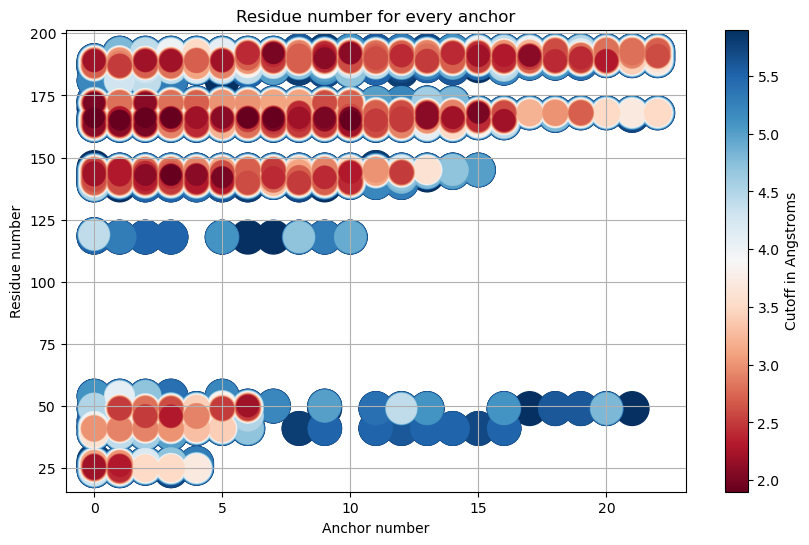

In [4]:
# Assuming you have your matrix defined as matrix

# Create a list to store the x values for each row
x_values = []

# Create a list to store the y values for each row
y_values = []
s_values = []

# Iterate through each row of the matrix
for i in range(len(matrix)):
    row_x = []
    row_y = []
    row_s = []
    for j in range(len(matrix[i])):
        if matrix[i][j]:  # Skip empty lists
            if isinstance(matrix[i][j], int):
                row_x.append(j)
                row_s.append(cutoff[i]*100)
                row_y.append(matrix[i][j])
            else:
                for s in range(0,len(matrix[i][j])):
                    row_x.append(j)
                    row_s.append(cutoff[i]*100)
                    row_y.append(matrix[i][j][s])
    x_values.append(row_x)
    s_values.append(row_s)
    y_values.append(row_y)

# Create a list to store the colors for each row
normalized_cutoff = (cutoff - np.min(cutoff)) / (np.max(cutoff) - np.min(cutoff))# Create a colormap from blue to red
cmap = plt.cm.get_cmap('RdBu')
colors = cmap(normalized_cutoff)  # Adjust colors as needed
# Create a colorbar
norm = plt.Normalize(vmin=np.min(cutoff), vmax=np.max(cutoff))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# Create the point plot
plt.figure(figsize=(10, 6))
sort_cutoff = sorted(cutoff, reverse=True)
for i in range(len(x_values)):
    j = cutoff.index(sort_cutoff[i])
    plt.scatter(x_values[j], y_values[j], color=colors[j], label=cutoff[j], s=s_values[j])

# Set plot labels and title
plt.xlabel("Anchor number")
plt.ylabel("Residue number")
plt.title("Residue number for every anchor")
plt.colorbar(sm, label='Cutoff in Angstroms', )  # Update colorbar label
# Show the plot
plt.grid(True)
plt.show()

In [5]:
param = []
param.append("Just nothing")
with open("/net/gpfs-amarolab/tklay/JAVI/root_1/anchor_0/building/hidr_metadyn_at_0.150_0.pdb", "r") as f:
    lines = [line.rstrip() for line in f]
i = 1
for line in lines:
    values = line.split()
    if values[0] == 'ATOM' and values[3]!='HOH':
        if values[5] == str(i):
            param.append(values[3])
            i = i +1

res_total = []
for res in y_values:
    res_row = []
    for res2 in res:
        res_row.append(param[res2])
    res_total.append(res_row)
s2_values = []
i=0
for resname in res_total:
    last = {n: k for k, n in enumerate(x_values[i])}
    j=0
    first = {n: k for k, n in reversed(list(enumerate(x_values[i])))}
    s2_row = []
    for res2name in resname:
        number = resname[first[x_values[i][j]]:(last[x_values[i][j]]+1)].count(res2name)*500
        s2_row.append(number)
        j=j+1
    s2_values.append(s2_row)
    i = i+1
    

/tmp/ipykernel_15416/2481962803.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Cutoff in Angstroms')  # Update colorbar label


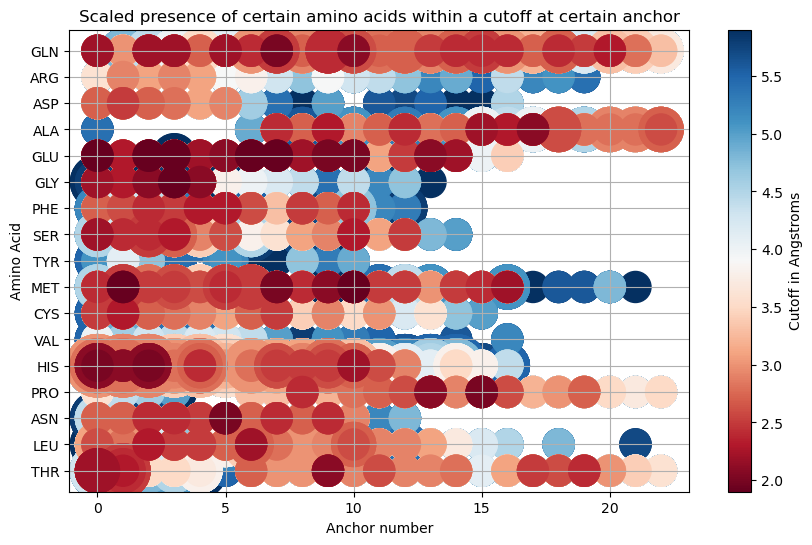

In [6]:
# Create the point plot
plt.figure(figsize=(10, 6))
for i in range(len(x_values)):
    j = cutoff.index(sort_cutoff[i])
    plt.scatter(x_values[j], res_total[j], color=colors[j], label=cutoff[j], s=s2_values[j])

# Set plot labels and title
plt.xlabel("Anchor number")
plt.ylabel("Amino Acid")
plt.title("Scaled presence of certain amino acids within a cutoff at certain anchor")

# Add legend

#lines = ax.plot(data)
#ax.legend(custom_lines, ['Cold', 'Medium', 'Hot'])
plt.colorbar(sm, label='Cutoff in Angstroms')  # Update colorbar label

# Show the plot
plt.grid(True)
plt.show()